In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("datasets/credit/german_credit_data.csv")

In [3]:
dataset.sample(5)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
479,479,44,male,2,own,little,little,1478,15,furniture/equipment,good
587,587,21,male,1,own,little,little,1289,12,furniture/equipment,good
115,115,47,male,2,own,NaN,NaN,3578,48,radio/TV,good
673,673,24,male,2,own,quite rich,NaN,2080,6,car,good
857,857,28,male,2,free,little,NaN,3343,15,furniture/equipment,good


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
dataset.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

Text(0.5, 1.0, 'Missing value heatmap')

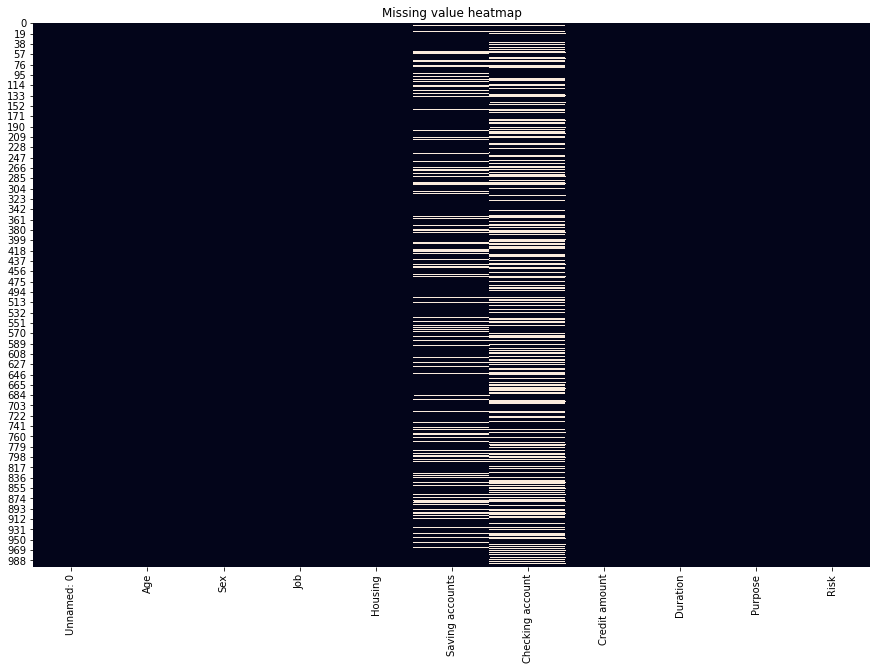

In [6]:
plt.figure(figsize=(15, 10))
sns.heatmap(dataset.isnull(),cbar = False).set_title("Missing value heatmap")

In [7]:
dataset.dropna(subset=['Saving accounts','Checking account'], inplace=True)

In [8]:
dataset.shape

(522, 11)

In [9]:
dataset.nunique()

Unnamed: 0          522
Age                  52
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       503
Duration             30
Purpose               8
Risk                  2
dtype: int64